## Testeos EMGSignal

Importando librerias

In [1]:
import sys
import os
project_path=os.path.abspath("..")
sys.path.insert(0,project_path)

from RawSignal import RawSignal
import numpy as np
from Info import Info
from Anotations import Anotaciones
from EMGSignal import EMGSignal
import pandas as pd

Cargamos la señal de emg

In [3]:
emg_data = np.load("..\data\emg\emg\emg.npy")

emg_data=np.reshape(emg_data,(1,388971)) #para tener n_canales,n_muestras
emg_data.shape

(1, 388971)

Creamos objetos info y anotaciones

In [7]:
info=Info(ch_types="EMG",sfreq=512)
anotaciones=Anotaciones()
df = pd.read_csv("..\data\emg\emg\eventos_emg.csv")
df['onset'] = df['onset'] / 512
output_path = "..\data\emg\emg\datos_convertidos_emg.csv"
df.to_csv(output_path, index=False)
df.to_csv(output_path, index=False)
anotaciones.load("..\proyecto\data\emg\emg\datos_convertidos_emg.csv")

Creamos objeto RawSignal

In [8]:
raw_emg=RawSignal(data=emg_data,sfreq=512,info=info,anotaciones=anotaciones)

In [9]:
raw_emg=raw_emg.filter(l_freq=5,h_freq=48) #filtramos

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB



Ploteamos

Creating RawArray with float64 data, n_channels=1, n_times=372957
    Range : 0 ... 372956 =      0.000 ...   728.430 secs
Ready.
Using matplotlib as 2D backend.


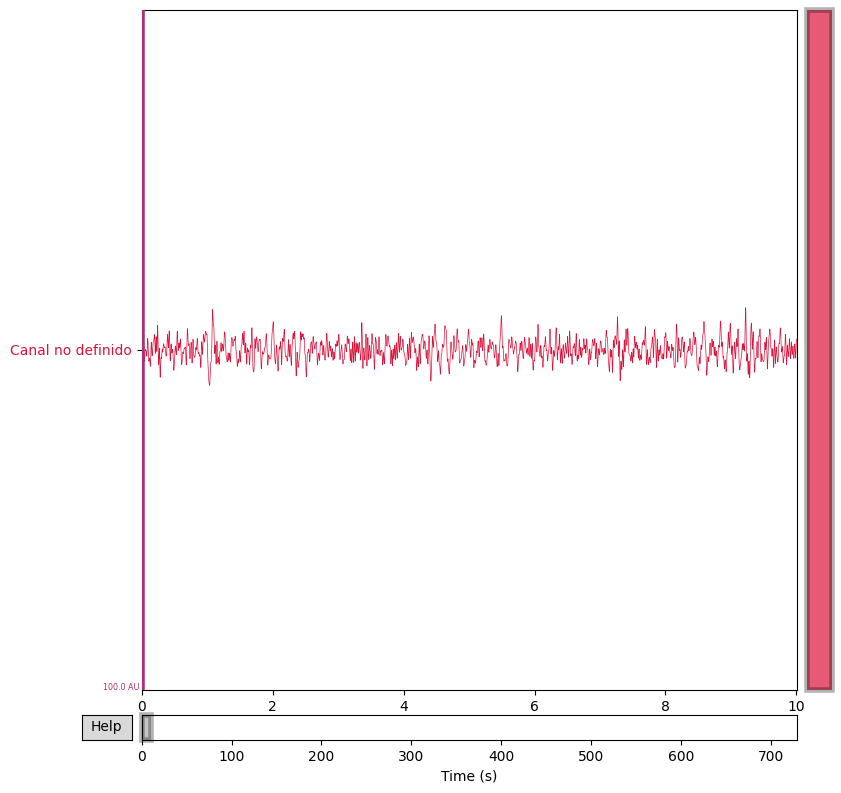

In [10]:
raw_emg=raw_emg.cut_before_event()
raw_emg.plot(scalings=50)
raw_emg= raw_emg.remove_segment(t_start=300,t_stop=400) #Cortamos ese segmento de la señal porque hay mucho ruido

Probando metodo detectar_activaciones()

In [11]:
emg_señal=EMGSignal(raw_emg,umbral=20)
puntos=emg_señal.detectar_activaciones()
for i, indices in enumerate(puntos):
    print(f"Canal {i}: número de activaciones: {len(indices)}")


Creating RawArray with float64 data, n_channels=1, n_times=321757
    Range : 0 ... 321756 =      0.000 ...   628.430 secs
Ready.
Canal 0: número de activaciones: 934


Probando metodo graficar_emg_con_umbral()

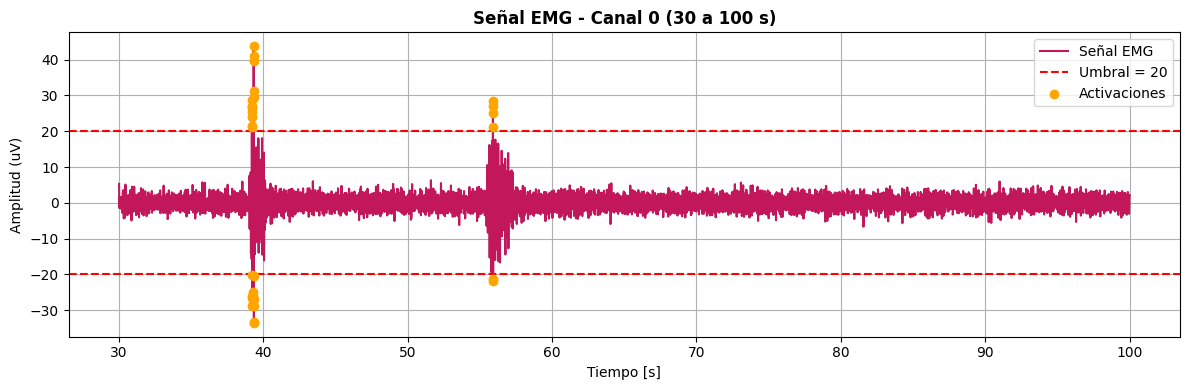

In [12]:
emg_señal.graficar_emg_con_umbral(t_inicio=30 ,t_fin=100)


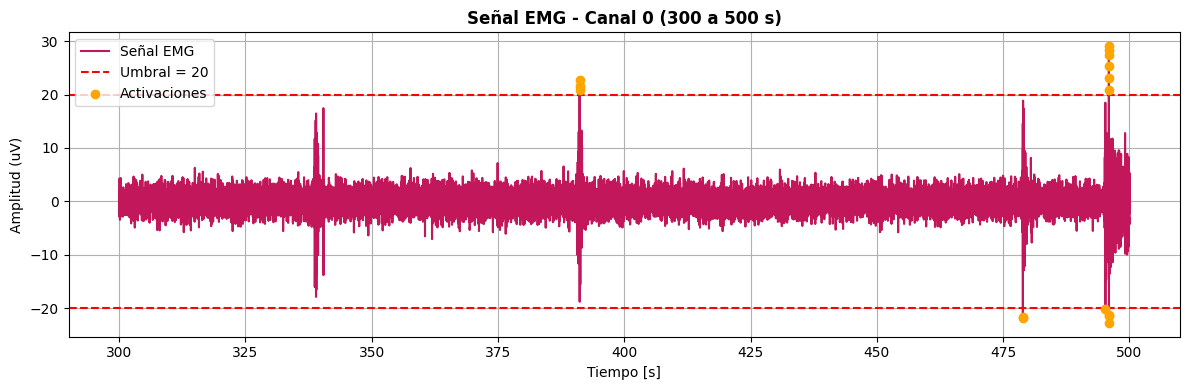

In [13]:
emg_señal.graficar_emg_con_umbral(t_inicio=300 ,t_fin=500)


Probando metodo graficar_tiempo_frecuencia()

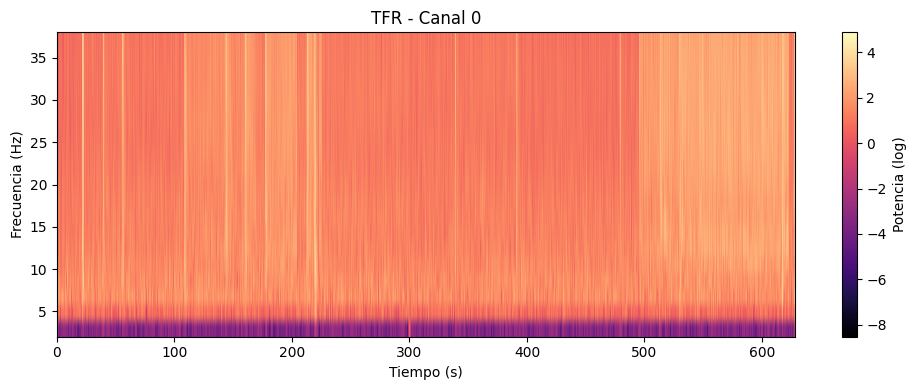

(array([[ 1.42795025,  1.42961353,  1.43120817, ...,  2.78041338,
          2.78276632,  2.78497317],
        [17.50546106, 17.81557199, 18.12820979, ..., 23.84620014,
         23.68568129, 23.52215834],
        [ 8.81151599,  9.19782494,  9.59732719, ..., 31.4634321 ,
         30.99346684, 30.51572201],
        ...,
        [ 0.25244167,  0.36896118,  0.5298943 , ...,  2.16773362,
          2.15489038,  2.10534148],
        [ 0.05512863,  0.12170867,  0.22853116, ...,  2.1694789 ,
          2.15045756,  2.09000061],
        [ 0.05092559,  0.09550901,  0.17586678, ...,  2.24985825,
          2.20081933,  2.1103217 ]]),
 array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
        6.28425781e+02, 6.28427734e+02, 6.28429688e+02]))

In [14]:
emg_señal.calcular_tfr(canal=0)

Probando metodo graficar_transformada_hilbert()

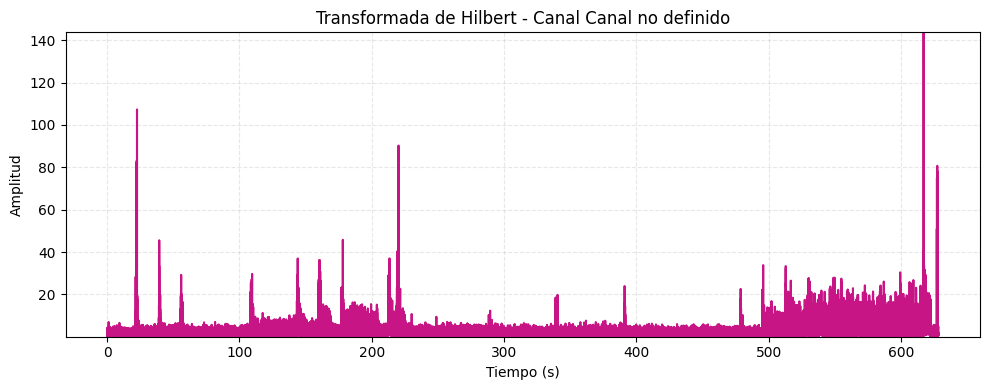

In [15]:
emg_señal.calcular_hilbert(envelope=True)